In [1]:
import numpy as np
import pandas as pd
from nptdms import TdmsFile as td
import matplotlib.pyplot as plt
import math
from scipy.fftpack import fft,fftshift
%matplotlib inline
%config InlineBackend.figure_format = 'svg'#将图片保存为矢量图

plt.rcParams['font.sans-serif']=['FangSong_GB2312'] #用来正常显示中文
plt.rcParams['axes.unicode_minus']=False  #用来正常显示负号|

### 求解采样长度

In [2]:
f1 = 34
f2 = 57
p = 2
n_e = int(60*f2/p)
print(n_e)

1710


In [3]:
path = 'C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/实验数据集/34_22/'

In [4]:
path1 = 'C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/论文绘图/'

In [5]:
rows = 51200*60

In [6]:
df1 = pd.read_csv(path+'34_22_正常_.csv',index_col=0,nrows=rows)
df2 = pd.read_csv(path+'34_22_断齿_.csv',index_col=0,nrows=rows)
df3 = pd.read_csv(path+'34_22_缺齿_.csv',index_col=0,nrows=rows)
df4 = pd.read_csv(path+'34_22_磨损_.csv',index_col=0,nrows=rows)
df5 = pd.read_csv(path+'34_22_裂纹_.csv',index_col=0,nrows=rows)
df6 = pd.read_csv(path+'34_22_偏心_.csv',index_col=0,nrows=rows)
# df7 = pd.read_csv(path+'34_22_滚动体_.csv',index_col=0,nrows=rows)
# df8 = pd.read_csv(path+'34_22_内圈_.csv',index_col=0,nrows=rows)
# df9 = pd.read_csv(path+'34_22_外圈_.csv',index_col=0,nrows=rows)
# df10 = pd.read_csv(path+'34_22_联合_.csv',index_col=0,nrows=rows)

C:\Users\shamrockyj\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
colors = ['#c0504d','#9bbb59','#4bacc6','#4f81bd','#8064a2']

In [8]:
N = 1
f = 1024

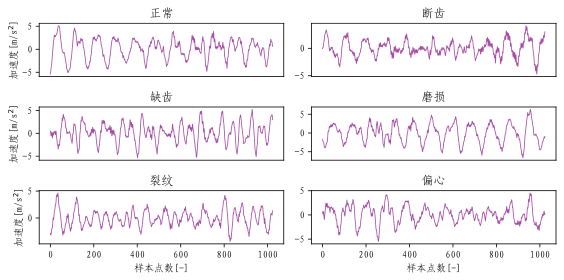

In [15]:
plt.figure(figsize = (8,4))
plt.subplot(3,2,1)
plt.plot(df1.iloc[:f,N],linewidth = 0.8,c='purple',alpha=0.7)
plt.title('正常')
plt.xticks([])
plt.ylabel('加速度[m/s$^2$]')

plt.subplot(3,2,2)
plt.plot(df2.iloc[:f,N],linewidth = 0.8,c='purple',alpha=0.7)
plt.title('断齿')
plt.xticks([])

plt.subplot(3,2,3)
plt.plot(df3.iloc[:f,N],linewidth = 0.8,c='purple',alpha=0.7)
plt.title('缺齿')
plt.ylabel('加速度[m/s$^2$]')
plt.xticks([])

plt.subplot(3,2,4)
plt.plot(df4.iloc[:f,N],linewidth = 0.8,c='purple',alpha=0.7)
plt.title('磨损')
plt.xticks([])

plt.subplot(3,2,5)
plt.plot(df5.iloc[:f,N],linewidth = 0.8,c='purple',alpha=0.7)
plt.title('裂纹')
plt.ylabel('加速度[m/s$^2$]')
plt.xlabel('样本点数[-]')

plt.subplot(3,2,6)
plt.plot(df6.iloc[:f,N],linewidth = 0.8,c='purple',alpha=0.7)
plt.title('偏心')
plt.xlabel('样本点数[-]')
plt.tight_layout()

plt.savefig(path1+'时域34_22_NI'+str(N+1)+'.png', dpi=300, bbox_inches='tight')

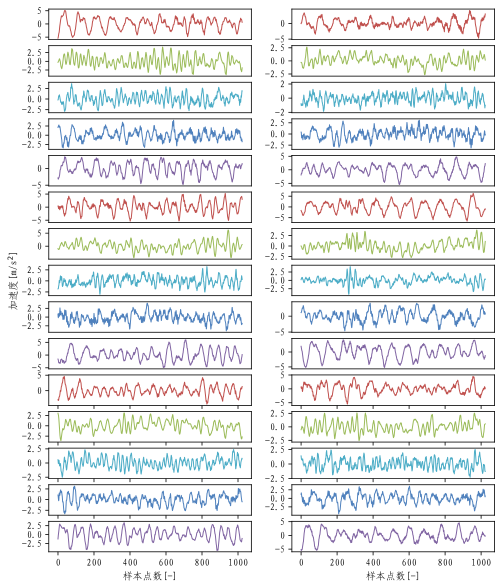

In [42]:
N = 1
f = 1024
plt.figure(figsize=(8,10))
plt.subplot(15,2,1)
plt.plot(df1.iloc[:f,1],c=colors[0],linewidth=1)
# plt.title('正常')
plt.xticks([])
# plt.ylabel('加速度[m/s$^2$]')
plt.subplot(15,2,3)
plt.plot(df1.iloc[:f,2],c=colors[1],linewidth=1)
plt.xticks([])
# plt.ylabel('加速度[m/s$^2$]')
plt.subplot(15,2,5)
plt.plot(df1.iloc[:f,3],c=colors[2],linewidth=1)
plt.xticks([])
# plt.ylabel('加速度[m/s$^2$]')
plt.subplot(15,2,7)
plt.plot(df1.iloc[:f,4],c=colors[3],linewidth=1)
plt.xticks([])
# plt.ylabel('加速度[m/s$^2$]')
plt.subplot(15,2,9)
plt.plot(df1.iloc[:f,5],c=colors[4],linewidth=1)
plt.xticks([])
# plt.ylabel('加速度[m/s$^2$]')

plt.subplot(15,2,2)
plt.plot(df2.iloc[:f,1],c=colors[0],linewidth=1)
plt.xticks([])
# plt.title('断齿')
plt.subplot(15,2,4)
plt.plot(df2.iloc[:f,2],c=colors[1],linewidth=1)
plt.xticks([])
plt.subplot(15,2,6)
plt.plot(df2.iloc[:f,3],c=colors[2],linewidth=1)
plt.xticks([])
plt.subplot(15,2,8)
plt.plot(df2.iloc[:f,4],c=colors[3],linewidth=1)
plt.xticks([])
plt.subplot(15,2,10)
plt.plot(df2.iloc[:f,5],c=colors[4],linewidth=1)
plt.xticks([])




plt.subplot(15,2,11)
plt.plot(df3.iloc[:f,1],c=colors[0],linewidth=1)
# plt.title('缺齿')
plt.xticks([])
# plt.ylabel('加速度[m/s$^2$]')
plt.subplot(15,2,13)
plt.plot(df3.iloc[:f,2],c=colors[1],linewidth=1)
plt.xticks([])
# plt.ylabel('加速度[m/s$^2$]')
plt.subplot(15,2,15)
plt.plot(df3.iloc[:f,3],c=colors[2],linewidth=1)
plt.xticks([])
plt.ylabel('加速度[m/s$^2$]')
plt.subplot(15,2,17)
plt.plot(df3.iloc[:f,4],c=colors[3],linewidth=1)
plt.xticks([])
# plt.ylabel('加速度[m/s$^2$]')
plt.subplot(15,2,19)
plt.plot(df3.iloc[:f,5],c=colors[4],linewidth=1)
plt.xticks([])
# plt.ylabel('加速度[m/s$^2$]')


plt.subplot(15,2,12)
plt.plot(df4.iloc[:f,1],c=colors[0],linewidth=1)
# plt.title('磨损')
plt.xticks([])
plt.subplot(15,2,14)
plt.plot(df4.iloc[:f,2],c=colors[1],linewidth=1)
plt.xticks([])
plt.subplot(15,2,16)
plt.plot(df4.iloc[:f,3],c=colors[2],linewidth=1)
plt.xticks([])
plt.subplot(15,2,18)
plt.plot(df4.iloc[:f,4],c=colors[3],linewidth=1)
plt.xticks([])
plt.subplot(15,2,20)
plt.plot(df4.iloc[:f,5],c=colors[4],linewidth=1)
plt.xticks([])


plt.subplot(15,2,21)
plt.plot(df5.iloc[:f,1],c=colors[0],linewidth=1)
# plt.ylabel('加速度[m/s$^2$]')
# plt.title('裂纹')
plt.subplot(15,2,23)
plt.plot(df5.iloc[:f,2],c=colors[1],linewidth=1)
# plt.ylabel('加速度[m/s$^2$]')
plt.subplot(15,2,25)
plt.plot(df5.iloc[:f,3],c=colors[2],linewidth=1)
# plt.ylabel('加速度[m/s$^2$]')
plt.subplot(15,2,27)
plt.plot(df5.iloc[:f,4],c=colors[3],linewidth=1)
# plt.ylabel('加速度[m/s$^2$]')
plt.subplot(15,2,29)
plt.plot(df5.iloc[:f,5],c=colors[4],linewidth=1)
# plt.ylabel('加速度[m/s$^2$]')
plt.xlabel('样本点数[-]')

plt.subplot(15,2,22)
plt.plot(df6.iloc[:f,1],c=colors[0],linewidth=1)
# plt.title('偏心')
plt.subplot(15,2,24)
plt.plot(df6.iloc[:f,2],c=colors[1],linewidth=1)
plt.subplot(15,2,26)
plt.plot(df6.iloc[:f,3],c=colors[2],linewidth=1)
plt.subplot(15,2,28)
plt.plot(df6.iloc[:f,4],c=colors[3],linewidth=1)
plt.subplot(15,2,30)
plt.plot(df6.iloc[:f,5],c=colors[4],linewidth=1)
plt.xlabel('样本点数[-]')
# plt.tight_layout()
# plt.savefig(path1+'时域34_22_NI'+str(N+1)+'.png', dpi=300, bbox_inches='tight')
# plt.savefig(path1+'时域34_22.png', dpi=300, bbox_inches='tight')

C:\Users\shamrockyj\Anaconda3\lib\site-packages\scipy\fft\_pocketfft\helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


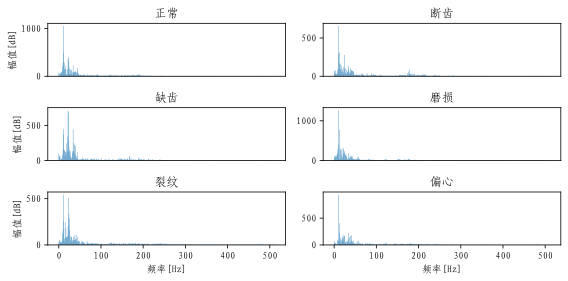

In [43]:
plt.figure(figsize = (8,4))
plt.subplot(3,2,1)
data_freq1 = fft(df1.iloc[:f,1])
mdata1 = fftshift(abs(data_freq1))
plt.bar(np.arange(0,f//2),mdata1[f//2:],linewidth = 0.8)
plt.title('正常')
plt.xticks([])
plt.ylabel('幅值[dB]')

plt.subplot(3,2,2)
data_freq2 = fft(df2.iloc[:f,1])
mdata2 = fftshift(abs(data_freq2))
plt.bar(np.arange(0,f//2),mdata2[f//2:],linewidth = 0.8)
plt.title('断齿')
plt.xticks([])

plt.subplot(3,2,3)
data_freq3 = fft(df3.iloc[:f,1])
mdata3 = fftshift(abs(data_freq3))
plt.bar(np.arange(0,f//2),mdata3[f//2:],linewidth = 0.8)
plt.title('缺齿')
plt.ylabel('幅值[dB]')
plt.xticks([])

plt.subplot(3,2,4)
data_freq4 = fft(df4.iloc[:f,1])
mdata4 = fftshift(abs(data_freq4))
plt.bar(np.arange(0,f//2),mdata4[f//2:],linewidth = 0.8)
plt.title('磨损')
plt.xticks([])

plt.subplot(3,2,5)
data_freq5 = fft(df5.iloc[:f,1])
mdata5 = fftshift(abs(data_freq5))
plt.bar(np.arange(0,f//2),mdata5[f//2:],linewidth = 0.8)
plt.title('裂纹')
plt.ylabel('幅值[dB]')
plt.xlabel('频率[Hz]')

plt.subplot(3,2,6)
data_freq6 = fft(df6.iloc[:f,1])
mdata6 = fftshift(abs(data_freq6))
plt.bar(np.arange(0,f//2),mdata6[f//2:],linewidth = 0.8)
plt.title('偏心')
plt.xlabel('频率[Hz]')
plt.tight_layout()

# plt.savefig(path1+'频域34_22_NI'+str(N+1)+'.png', dpi=300, bbox_inches='tight')

Text(0, 0.5, '幅值[dB]')

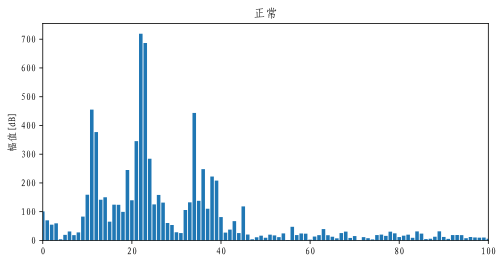

In [49]:
plt.figure(figsize = (8,4))
# plt.subplot(3,2,1)
data_freq1 = fft(df3.iloc[:f,1])
mdata1 = fftshift(abs(data_freq1))
plt.bar(np.arange(0,f//2),mdata1[f//2:],linewidth = 0.8)
plt.title('正常')
# plt.xticks([])
plt.xlim([0,100])
plt.ylabel('幅值[dB]')

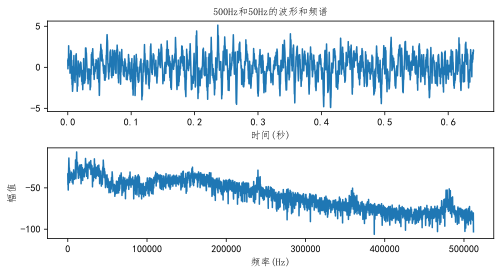

In [28]:
import numpy as np#导入一个数据处理模块

import matplotlib.pyplot as plt#导入一个绘图模块

# 依据快速傅里叶算法得到信号的频域
sampling_rate = 51200  # 采样率
fft_size = 5120  # FFT取样长度
#     t = np.arange(0, 8.192, 1.0 / sampling_rate)
#np.arange(起点，终点，间隔)产生8.192s长的取样时间
x=df3.iloc[:,4]
# 两个正弦波叠加，500HZ和50HZ
# N点FFT进行精确频谱分析的要求是N个取样点包含整数个取样对象的波形。
# 因此N点FFT能够完美计算频谱对取样对象的要求是n*Fs/N（n*采样频率/FFT长度），
# 因此对8KHZ和512点而言，完美采样对象的周期最小要求是8000/512=15.625HZ,
# 所以156.25的n为10,234.375的n为15。

xs = x[:fft_size]# 从波形数据中取样fft_size个点进行运算

xf = np.fft.rfft(xs) / fft_size  # 返回fft_size/2+1 个频率
#利用np.fft.rfft()进行FFT计算，rfft()是为了更方便对实数信号进行变换，
# 由公式可知 / fft_size为了正确显示波形能量
# rfft函数的返回值是N/2+1个复数，分别表示从0(Hz)到sampling_rate/2(Hz)的分。

# 于是可以通过下面的np.linspace计算出返回值中每个下标对应的真正的频率：
freqs = np.linspace(0, sampling_rate*10, fft_size//2+1 )  # 表示频率
#freqs = np.linspace(0, sampling_rate/2 , fft_size/2  + 1)  # 表示频率

xfp = 20 * np.log10(np.clip(np.abs(xf), 1e-20, 1e100))
#xfp = np.abs(xf) * 2  # 代表信号的幅值，即振幅
# 最后我们计算每个频率分量的幅值，并通过 20*np.log10()将其转换为以db单位的值。
# 为了防止0幅值的成分造成log10无法计算，我们调用np.clip对xf的幅值进行上下限处理

plt.figure(figsize=(8, 4))
plt.subplot(211)
plt.plot(t[:fft_size], xs)
plt.xlabel(u"时间(秒)", fontproperties='FangSong')
plt.title(u"500Hz和50Hz的波形和频谱", fontproperties='FangSong')

plt.subplot(212)
plt.plot(freqs, xfp)
plt.xlabel(u"频率(Hz)", fontproperties='FangSong')
#字体FangSong
plt.ylabel(u'幅值', fontproperties='FangSong')
plt.subplots_adjust(hspace=0.4)
'''subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
有六个可选参数来控制子图布局。值均为0~1之间。其中left、bottom、right、top围成的区域就是子图的区域。
wspace、hspace分别表示子图之间左右、上下的间距。实际的默认值由matplotlibrc文件控制的。
'''
plt.show()

#### 定义信号时域特征

In [61]:
def get_time_domain_features(data):
    '''data为一维振动信号'''
    x_rms = 0
    absXbar = 0
    x_r = 0
    S = 0
    K = 0
    k = 0
    x_rms = 0
    fea = []
    len_ = len(data)
    mean_ = data.mean(axis=0)  # 1.均值
    var_ = data.var(axis=0)  # 2.方差
    std_ = data.std(axis=0)  # 3.标准差
    max_ = data.max(axis=0)  # 4.最大值
    min_ = data.min(axis=0)  # 5.最小值
    x_p = max(abs(max_[0]), abs(min_[0]))  # 6.峰值
    x_pp = abs(max_[0])+ abs(min_[0])
#     for i in range(len_):
#         x_rms += data.iloc[i, 0] ** 2
#         absXbar += abs(data.iloc[i, 0])
#         x_r += math.sqrt(abs(data.iloc[i, 0]))
#         S += (data.iloc[i, 0] - mean_[0]) ** 3
#         K += (data.iloc[i, 0] - mean_[0]) ** 4
#     x_rms = math.sqrt(x_rms / len_)  # 7.均方根值
#     absXbar = absXbar / len_  # 8.绝对平均值
#     x_r = (x_r / len_) ** 2  # 9.方根幅值
#     W = x_rms / mean_[0]  # 10.波形指标
#     C = x_p / x_rms  # 11.峰值指标
#     I = x_p / mean_[0]  # 12.脉冲指标
#     L = x_p / x_r  # 13.裕度指标
#     S = S / ((len_ - 1) * std_[0] ** 3)  # 14.偏斜度
#     K = K / ((len_ - 1) * std_[0] ** 4)  # 15.峭度
    fea = [mean_[0],var_[0],std_[0],max_[0],min_[0],x_p,x_pp]
#     fea = [mean_[0],absXbar,var_[0],std_[0],x_r,x_rms,x_p,max_[0],min_[0],W,C,I,L,S,K]
    result = ['{:.3f}'.format(i) for i in fea] 
    return result

In [158]:
M = 6

In [159]:
time_feature1 = get_time_domain_features(pd.DataFrame(df1.iloc[:,M]))

In [160]:
time_feature2 = get_time_domain_features(pd.DataFrame(df2.iloc[:,M]))

In [161]:
time_feature3 = get_time_domain_features(pd.DataFrame(df3.iloc[:,M]))

In [162]:
time_feature4 = get_time_domain_features(pd.DataFrame(df4.iloc[:,M]))

In [163]:
time_feature5 = get_time_domain_features(pd.DataFrame(df5.iloc[:,M]))

In [164]:
time_feature6 = get_time_domain_features(pd.DataFrame(df6.iloc[:,M]))

In [165]:
time_feature7 = get_time_domain_features(pd.DataFrame(df7.iloc[:,M]))

In [166]:
time_feature8 = get_time_domain_features(pd.DataFrame(df8.iloc[:,M]))

In [167]:
time_feature9 = get_time_domain_features(pd.DataFrame(df9.iloc[:,M]))

In [168]:
time_feature10 = get_time_domain_features(pd.DataFrame(df10.iloc[:,M]))

In [169]:
time_feature10

['0.020', '1.032', '1.016', '4.448', '-4.252', '4.448', '8.700']

In [170]:
feature1 = pd.DataFrame(time_feature1).T
feature2 = pd.DataFrame(time_feature2).T
feature3 = pd.DataFrame(time_feature3).T
feature4 = pd.DataFrame(time_feature4).T
feature5 = pd.DataFrame(time_feature5).T
feature6 = pd.DataFrame(time_feature6).T
feature7 = pd.DataFrame(time_feature7).T
feature8 = pd.DataFrame(time_feature8).T
feature9 = pd.DataFrame(time_feature9).T
feature10 = pd.DataFrame(time_feature10).T

In [171]:
feature = pd.concat([feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10],axis = 0)

In [172]:
feature.columns = ['均值','方差','标准差','最大值','最小值','峰值','峰峰值']
feature.index = np.arange(0,10)

In [173]:
feature.to_csv(path+'时域特征'+str(M)+'.csv',encoding='utf_8_sig')

In [174]:
# time_feature = pd.read_csv(path+'34_22_0时域特征.csv',index_col=0)

In [175]:
feature

,均值,方差,标准差,最大值,最小值,峰值,峰峰值
0,0.023,1.142,1.069,4.630,-4.711,4.711,9.341
1,0.024,1.100,1.049,4.900,-4.697,4.900,9.597
2,0.022,1.146,1.070,5.305,-4.968,5.305,10.273
3,0.021,1.239,1.113,5.311,-5.544,5.544,10.855
4,0.021,0.999,1.000,4.337,-4.489,4.489,8.826
5,0.021,1.110,1.054,4.809,-4.651,4.809,9.460
6,0.023,1.103,1.050,4.558,-4.316,4.558,8.874
7,0.023,1.033,1.016,4.324,-3.941,4.324,8.265
8,0.021,1.161,1.078,4.247,-4.352,4.352,8.599
9,0.020,1.032,1.016,4.448,-4.252,4.448,8.700


### 不同工况数据对比


In [50]:
path1 = 'C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/实验数据集/34_22/'
path2 = 'C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/实验数据集/34_44/'
path3 = 'C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/实验数据集/57_22/'
path4 = 'C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/实验数据集/57_44/'

In [51]:
rows = 51200*60
f1 = 0
f2 = 512*2

In [52]:
df1 = pd.read_csv(path1+'34_22_正常_.csv',index_col=0,nrows=rows)
df2 = pd.read_csv(path2+'34_44_正常_.csv',index_col=0,nrows=rows)
df3 = pd.read_csv(path3+'57_22_正常_.csv',index_col=0,nrows=rows)
df4 = pd.read_csv(path4+'57_44_正常_.csv',index_col=0,nrows=rows)

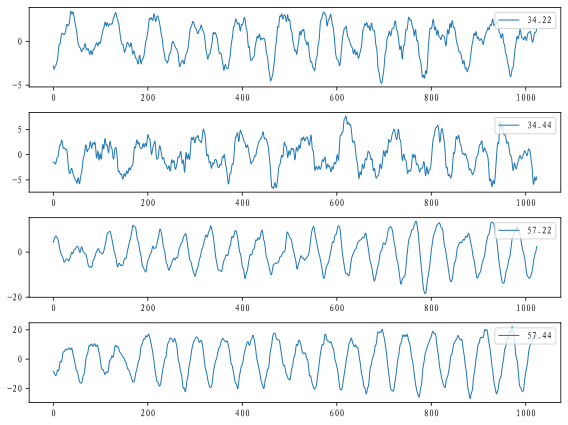

In [53]:
N = 5
plt.figure(figsize=(8,6))
plt.subplot(4,1,1)
plt.plot(df1.iloc[f1:f2,N],label = '34_22',linewidth=1)
plt.legend(loc = 'upper right')
plt.subplot(4,1,2)
plt.plot(df2.iloc[f1:f2,N],label = '34_44',linewidth=1)
plt.legend(loc = 'upper right')
plt.subplot(4,1,3)
plt.plot(df3.iloc[f1:f2,N],label = '57_22',linewidth=1)
plt.legend(loc = 'upper right')
plt.subplot(4,1,4)
plt.plot(df4.iloc[f1:f2,N],label = '57_44',linewidth=1)
plt.legend(loc = 'upper right')
plt.tight_layout()
# plt.savefig(path1+'正常_NI3.png', dpi=300, bbox_inches='tight')

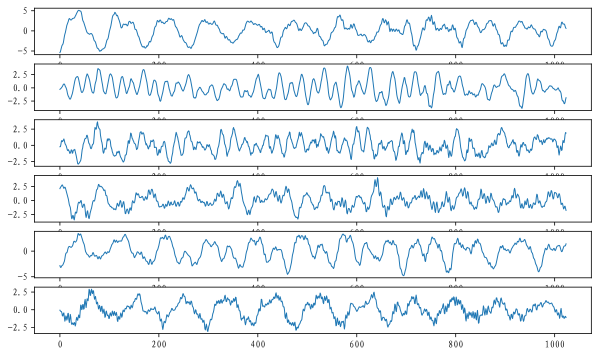

In [54]:
plt.figure(figsize=(10,6))
plt.subplot(6,1,1)
plt.plot(df1.iloc[f1:f2,1],label = 'NI_2',linewidth=1)
plt.subplot(6,1,2)
plt.plot(df1.iloc[f1:f2,2],label = 'NI_3',linewidth=1)
plt.subplot(6,1,3)
plt.plot(df1.iloc[f1:f2,3],label = 'NI_4',linewidth=1)
plt.subplot(6,1,4)
plt.plot(df1.iloc[f1:f2,4],label = 'NI_5',linewidth=1)
plt.subplot(6,1,5)
plt.plot(df1.iloc[f1:f2,5],label = 'NI_6',linewidth=1)
plt.subplot(6,1,6)
plt.plot(df1.iloc[f1:f2,6],label = 'NI_7',linewidth=1)

Text(0, 0.5, '幅值[dB]')

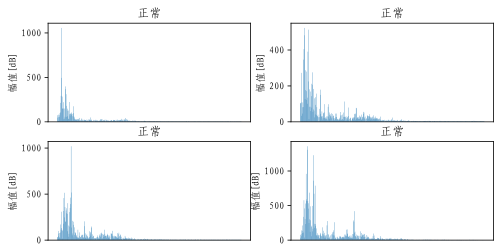

In [57]:
plt.figure(figsize = (8,4))
plt.subplot(2,2,1)
data_freq1 = fft(df1.iloc[:f,1])
mdata1 = fftshift(abs(data_freq1))
plt.bar(np.arange(0,f//2),mdata1[f//2:],linewidth = 0.8)
plt.title('正常')
plt.xticks([])
plt.ylabel('幅值[dB]')

plt.subplot(2,2,2)
data_freq2 = fft(df2.iloc[:f,1])
mdata2 = fftshift(abs(data_freq2))
plt.bar(np.arange(0,f//2),mdata2[f//2:],linewidth = 0.8)
plt.title('正常')
plt.xticks([])
plt.ylabel('幅值[dB]')

plt.subplot(2,2,3)
data_freq3 = fft(df3.iloc[:f,1])
mdata3 = fftshift(abs(data_freq3))
plt.bar(np.arange(0,f//2),mdata3[f//2:],linewidth = 0.8)
plt.title('正常')
plt.xticks([])
plt.ylabel('幅值[dB]')

plt.subplot(2,2,4)
data_freq4 = fft(df4.iloc[:f,1])
mdata4 = fftshift(abs(data_freq4))
plt.bar(np.arange(0,f//2),mdata4[f//2:],linewidth = 0.8)
plt.title('正常')
plt.xticks([])
plt.ylabel('幅值[dB]')